<a href="https://colab.research.google.com/github/LilianYou/Sea_Hero_Quest/blob/main/DemographicsAnalysis_shared.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Characterizing self-reported navigation ability using demographic information

## Exploratary Analysis

### read data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/Data/

/content/drive/.shortcut-targets-by-id/1pS1W_QFv_TreubUVne2-kLNgsBSGwhhw/Data


In [ ]:
df_raw = pd.read_csv(r'2019user_cleaned_3121970.csv')

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771628 entries, 0 to 771627
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   uuid               771628 non-null  object 
 1   age                771628 non-null  float64
 2   education          771628 non-null  object 
 3   gender             771628 non-null  object 
 4   hand               771628 non-null  object 
 5   home_environment   771628 non-null  object 
 6   location           771628 non-null  object 
 7   navigating_skills  771628 non-null  object 
 8   sleep              771628 non-null  float64
 9   travel_time        771628 non-null  object 
dtypes: float64(2), object(8)
memory usage: 58.9+ MB


### Age & Sleep

In [ ]:
df_raw.describe()

,age,sleep
count,771628.000000,771628.000000
mean,38.610113,6.986715
std,14.548005,1.197783
min,19.000000,3.000000
25%,26.000000,6.000000
50%,36.000000,7.000000
75%,50.000000,8.000000
max,70.000000,12.000000


In [ ]:
df_raw.gender.value_counts()

m    404455
f    367173
Name: gender, dtype: int64

In [ ]:
df = df_raw.copy()[['age','education','gender','hand','home_environment','navigating_skills','sleep','travel_time']]

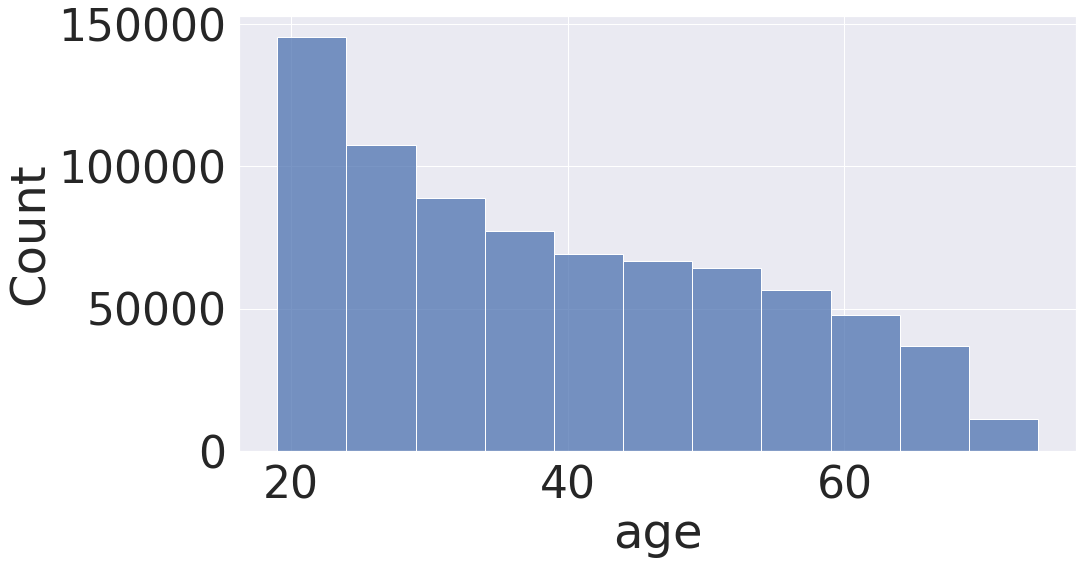

In [ ]:
plt.style.use('seaborn')
sns.set(font_scale = 4, rc = {'figure.figsize':(15,8)})
sns.histplot(data=df,x="age",binwidth = 5)
plt.savefig('age_distri.png',bbox_inches = 'tight')

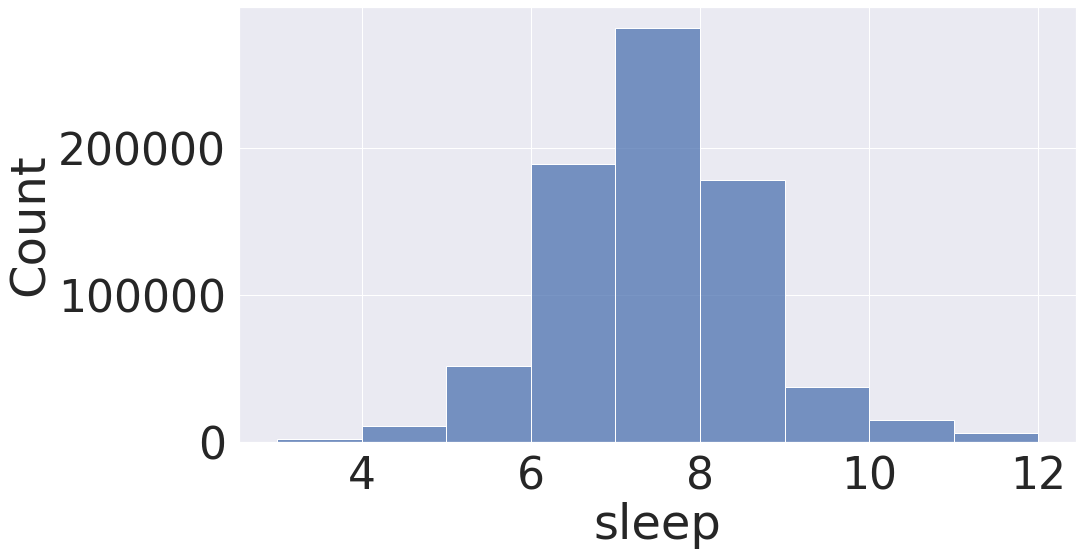

In [ ]:
sns.histplot(data=df,x="sleep",binwidth = 1)

In [ ]:
df[['age','sleep']].median()

age      36.0
sleep     7.0
dtype: float64

### Gender

In [ ]:
df["gender"].value_counts()/df.shape[0]

m    0.524158
f    0.475842
Name: gender, dtype: float64

### Education

In [ ]:
#recode
df['education'] = df['education'].apply(lambda x: 'tertiary' if x=='college'or x == 'university' else 'secondary')
df['education'] = pd.Categorical(df['education'], 
                                 categories=['secondary','tertiary'], ordered=True)

In [ ]:
df["education"].value_counts()/df.shape[0]

tertiary     0.717698
secondary    0.282302
Name: education, dtype: float64

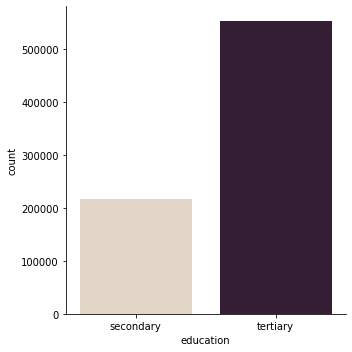

In [ ]:
sns.catplot(x="education", kind="count", palette="ch:.25", data=df)

### Handedness

In [ ]:
df["hand"].value_counts()/df.shape[0]

right    0.900954
left     0.099046
Name: hand, dtype: float64

### Home Environment

In [ ]:
df['home_environment'].value_counts()/df.shape[0]

suburbs    0.318619
city       0.306460
mixed      0.203177
rural      0.171745
Name: home_environment, dtype: float64

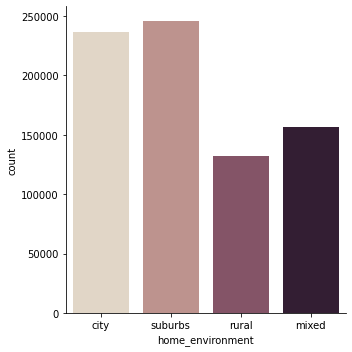

In [ ]:
sns.catplot(x="home_environment", kind="count", palette="ch:.25", data=df)

### Self-reported Navigating Skills (SRNS)

In [ ]:
df['navigating_skills'] = pd.Categorical(df['navigating_skills'], 
                                 categories=['very-bad','bad','good','very-good'], 
                                 ordered=True)

In [ ]:
df['navigating_skills'].value_counts()/df.shape[0]

good         0.545329
very-good    0.318606
bad          0.115356
very-bad     0.020709
Name: navigating_skills, dtype: float64

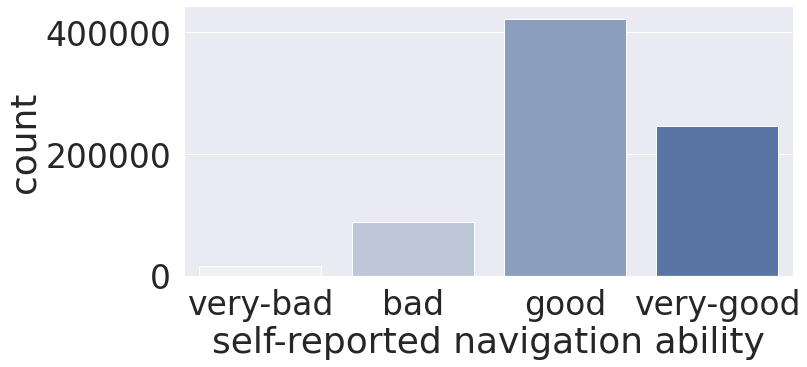

In [ ]:
plt.style.use('seaborn')
sns.set(font_scale = 3)
ax = sns.catplot(x="navigating_skills", kind="count", palette="light:b",data=df,height=6, aspect=2)
ax.set(xlabel='self-reported navigation ability')
plt.savefig('hs_self_reported_navigating_skills.png',bbox_inches = 'tight')

### Daily Commute Time

In [ ]:
df['travel_time'] = pd.Categorical(df['travel_time'], 
                                 categories=['less-30-mins','30-mins-to-1-hour','hour-plus'], 
                                 ordered=True)

In [ ]:
df['travel_time'].value_counts()/df.shape[0]

less-30-mins         0.399630
30-mins-to-1-hour    0.347261
hour-plus            0.253109
Name: travel_time, dtype: float64

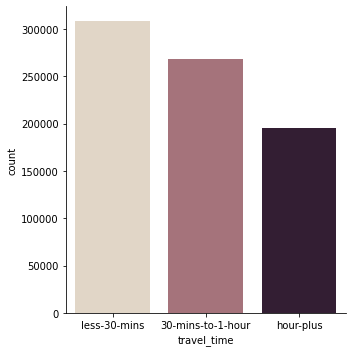

In [ ]:
sns.catplot(x="travel_time", kind="count", palette="ch:.25", data=df)

### Bivariate spearman correlation

In [ ]:
df.head()

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time
0,68.0,tertiary,f,right,city,bad,8.0,less-30-mins
1,21.0,tertiary,f,right,suburbs,good,7.0,30-mins-to-1-hour
2,36.0,tertiary,m,right,rural,very-good,5.0,30-mins-to-1-hour
3,19.0,secondary,m,right,mixed,good,8.0,less-30-mins
4,61.0,tertiary,m,right,suburbs,good,7.0,less-30-mins


In [ ]:
df_model = df.copy()
recode_map = {"gender": {'f': 0,'m': 1},
                   "hand": {'right': 0,'left': 1},
                   "education":{"secondary":0, "tertiary":1},
                   "travel_time":{"less-30-mins":0, "30-mins-to-1-hour":1, "hour-plus":2},
                   "home_environment":{"rural":0,"suburbs":1,"mixed":1,"city":2}}
df_model = df_model.replace(recode_map)


In [ ]:
df_model.head()

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time
0,68.0,1,0,0,2,bad,8.0,0
1,21.0,1,0,0,1,good,7.0,1
2,36.0,1,1,0,0,very-good,5.0,1
3,19.0,0,1,0,1,good,8.0,0
4,61.0,1,1,0,1,good,7.0,0


In [ ]:
print(stats.spearmanr(df_model.age,df_model.sleep))
print(stats.spearmanr(df_model.age,df_model.education))

SpearmanrResult(correlation=-0.1200571891013105, pvalue=0.0)
SpearmanrResult(correlation=-0.0237331439285974, pvalue=1.5034643294471859e-96)


In [ ]:
df_model.corr(method= 'spearman')

,age,education,gender,hand,home_environment,sleep,travel_time
age,1.000000,-0.023733,-0.055903,-0.012966,-0.052783,-0.120057,-0.146072
education,-0.023733,1.000000,-0.008282,-0.006270,0.020896,-0.018880,0.007738
gender,-0.055903,-0.008282,1.000000,0.031291,0.047229,-0.059097,0.111290
hand,-0.012966,-0.006270,0.031291,1.000000,-0.016572,0.003371,-0.015410
home_environment,-0.052783,0.020896,0.047229,-0.016572,1.000000,0.000591,0.068498
sleep,-0.120057,-0.018880,-0.059097,0.003371,0.000591,1.000000,-0.063806
travel_time,-0.146072,0.007738,0.111290,-0.015410,0.068498,-0.063806,1.000000


In [ ]:
def self_nav_num(rating):
    if rating == 'very-good':
      return '3'
    elif rating == 'good':
      return '2'
    elif rating == 'bad':
      return '1'
    else:
      return '0'

df_model['nav_num'] = df_model['navigating_skills'].apply(self_nav_num)

df_model['nav_num'] = pd.Categorical(df_model['nav_num'], 
                                 categories=['0','1','2','3'], 
                                 ordered=True)

In [ ]:
df_model.head()

,age,education,gender,hand,home_environment,navigating_skills,sleep,travel_time,nav_num
0,68.0,1,0,0,2,bad,8.0,0,1
1,21.0,1,0,0,1,good,7.0,1,2
2,36.0,1,1,0,0,very-good,5.0,1,3
3,19.0,0,1,0,1,good,8.0,0,2
4,61.0,1,1,0,1,good,7.0,0,2


In [ ]:
df_model.to_csv("2019_cleaned_demographics_3121970.csv",index=False)